***Use the iris dataset.***

Perform clustering with sepal length, sepal width, and petal length.
- i. Use a k of 4.
- ii. Create a 3d visualization that shows your clusters along with the features specified above?
- iii. Is 4 the optimal number? Try different values of k and visualize your results.

In [22]:
from pydataset import data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

In [4]:
iris = data('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
iris = iris.rename(columns = {'Sepal.Width': 'sepal_width', 'Sepal.Length': 'sepal_length', 'Petal.Length': 'petal_length', 'Petal.Width': 'petal_width', 'Species': 'species'})

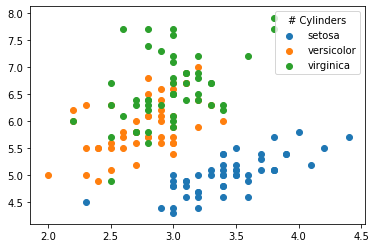

In [11]:
for s in sorted(iris.species.unique()):
    subset = iris[iris.species == s]
    plt.scatter(subset.sepal_width, subset.sepal_length, label=s)
plt.legend(title='# Cylinders')

In [14]:
X = iris.drop(['species'], axis = 1)
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

   k         sse
0  1  681.370600
1  2  152.347952
2  3   78.851441
3  4   57.228473
4  5   46.446182
5  6   39.039987
6  7   34.612498
7  8   30.160210
8  9   28.713278


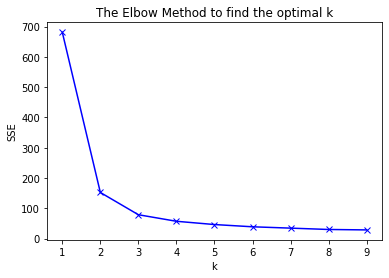

In [18]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

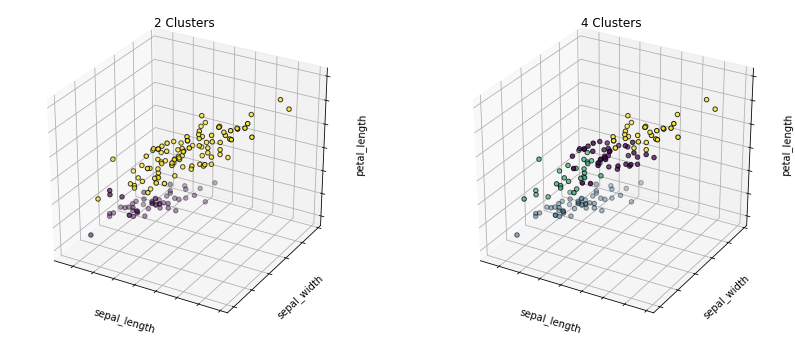

In [23]:

estimators = [('2 Clusters', KMeans(n_clusters=2)),
              ('4 Clusters', KMeans(n_clusters=4))]
fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})

for ax, (title, kmeans) in zip(axs, estimators):
    # fit the kmeans object
    kmeans.fit(X)

    labels = kmeans.labels_

    ax.scatter(X.sepal_length, 
               X.sepal_width, 
               X.petal_length,
               c=labels.astype(np.float), edgecolor='k')
    ax.set(xticklabels=[], yticklabels=[], zticklabels=[])
    ax.set(xlabel='sepal_length', ylabel='sepal_width', zlabel='petal_length')
    ax.set(title=title)